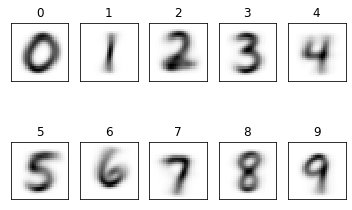

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pdb
import sys, ast

file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

train_data = data[0:6000]
test_data = data[6000:10000]


size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image_train   = len(train_data)
num_image_test    = len(test_data)



count1     = 0     # count for the number of images
count2     = 0

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image_train  = np.empty((size_row * size_col, num_image_train), dtype=float)
list_label_train  = np.empty(num_image_train, dtype=int)


list_image_test  = np.empty((size_row*size_col,num_image_test),dtype=float)
list_label_test  = np.empty(num_image_test,dtype=int)

for line1 in train_data:

    line_data   = line1.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)
    len(label)

    list_label_train[count1]       = label
    list_image_train[:, count1]    = im_vector

    count1 += 1

    
    

for line2 in test_data:

    line_data   = line2.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count2]       = label
    list_image_test[:, count2]    = im_vector

    count2 += 1

    
    
#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image_train):

    im_average[:, list_label_train[i]] += list_image_train[:, i]
    im_count[list_label_train[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()
########################################

 Plot the loss curve

In [33]:
def relu(Z):

    A = np.maximum(0,Z)
    cache = {}
    cache["Z"] = Z
    return A, cache

def relu_der(dA, cache):
   
    dZ = np.array(dA, copy=True)
    Z = cache["Z"]
    dZ[Z<0] = 0
    return dZ

def linear(Z):
 
    A = Z
    cache = {}
    cache["Z"] = Z
    return A, cache

def linear_der(dA, cache):

    dZ = np.array(dA, copy=True)
    return dZ

In [34]:
def softmax_cross_entropy_loss(Z, Y=np.array([])):
 
    ### CODE HERE

    A = np.exp(Z - np.max(Z,axis = 0)) / np.sum(np.exp(Z-np.max(Z,axis = 0)),axis = 0,keepdims = True)
    # print "A : ",A
    if Y.shape[0] == 0:
        loss = []
    else:
        loss = -np.sum(Y*np.log(A+1e-8))   / A.shape[1]
    # loss = 0.05
    cache = {}
    cache["A"] = A
    return A, cache, loss

def softmax_cross_entropy_loss_der(Y, cache):

    ### CODE HERE 
    A = cache["A"]
    dZ = A - Y
    return dZ

def initialize_multilayer_weights(net_dims):
    
    np.random.seed(0)
    numLayers = len(net_dims)
    parameters = {}
    for l in range(numLayers-1):
        parameters["W"+str(l+1)] = np.random.normal(0, np.sqrt(2.0/net_dims[l]), (net_dims[l+1],net_dims[l]))
        parameters["b"+str(l+1)] = np.random.normal(0, np.sqrt(2.0/net_dims[l]), (net_dims[l+1],1))
    return parameters

def linear_forward(A, W, b):

    ### CODE HERE
    Z = np.dot(W, A) + b

    cache = {}
    cache["A"] = A
    return Z, cache

def layer_forward(A_prev, W, b, activation):

    Z, lin_cache = linear_forward(A_prev, W, b)
    if activation == "relu":
        A, act_cache = relu(Z)
    elif activation == "linear":
        A, act_cache = linear(Z)
    
    cache = {}
    cache["lin_cache"] = lin_cache
    cache["act_cache"] = act_cache
    return A, cache

def multi_layer_forward(X, parameters):
 
    L = len(parameters)//2  
    A = X
    caches = []
    for l in range(1,L):  # since there is no W0 and b0
        A, cache = layer_forward(A, parameters["W"+str(l)], parameters["b"+str(l)], "relu")
        caches.append(cache)    

    AL, cache = layer_forward(A, parameters["W"+str(L)], parameters["b"+str(L)], "linear")
    caches.append(cache)
    return AL, caches


In [35]:
def linear_backward(dZ, cache, W, b):
  
    A= cache["A"]
    # print "A : ",A
    # print "A sum : ",np.sum(A)
    # print "W : ",W
    dA_prev = np.dot(W.T, dZ)
    # print "Da : ",dA_prev
    dW = np.dot(dZ, A.T) / A.shape[1]
    # print "DW : ",dW
    # print "DW sum : ",np.sum(dW)
    db = np.sum(dZ,axis = 1 , keepdims = True) / A.shape[1]
    # print "Db : ",db

    ## CODE HERE
    return dA_prev, dW, db

def layer_backward(dA, cache, W, b, activation):

    lin_cache = cache["lin_cache"]
    act_cache = cache["act_cache"]

    if activation == "sigmoid":
        dZ = sigmoid_der(dA, act_cache)
    elif activation == "tanh":
        dZ = tanh_der(dA, act_cache)
    elif activation == "relu":
        dZ = relu_der(dA, act_cache)
    elif activation == "linear":
        dZ = linear_der(dA, act_cache)
    dA_prev, dW, db = linear_backward(dZ, lin_cache, W, b)
    return dA_prev, dW, db

def multi_layer_backward(dAL, caches, parameters):
  

    L = len(caches)  # with one hidden layer, L = 2
    gradients = {}
    dA = dAL
    activation = "linear"
    for l in reversed(range(1,L+1)):
        # print "Layer ",l
        dA, gradients["dW"+str(l)], gradients["db"+str(l)] = \
                    layer_backward(dA, caches[l-1], \
                    parameters["W"+str(l)],parameters["b"+str(l)],\
                    activation)
        activation = "relu"
    return gradients